## Crypto Arbitrage

 An analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

Sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

### Step 1: Import CSV File

In [197]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp =pd.read_csv(
  Path('Resources/bitstamp.csv'),
  index_col=('Timestamp') , parse_dates=True, infer_datetime_format=True)

### Step 2: Show CSV File

bitstamp.tail()

### Step 3: Repeat for `coinbase.csv` file.

In [198]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase=pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col=('Timestamp') , parse_dates=True, infer_datetime_format=True)


In [199]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

 Prepare and clean your data for analysis

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [200]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [201]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")

C:\Users\brpro\AppData\Local\Temp\ipykernel_15868\4269913456.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")


### Step 3: Convert the data type of the Close column to a `float`.

In [202]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [203]:
bitstamp.duplicated().sum()
# Contained no duplicated values

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [204]:
# Repeat Steps 1–4 for the coinbase DataFrame

coinbase = coinbase.dropna()

coinbase.loc[:,"Close"] =coinbase.loc[:,"Close"].str.replace("$","")
coinbase.loc[:,"Close"] =coinbase.loc[:,"Close"].astype("float")

coinbase.duplicated().sum()


C:\Users\brpro\AppData\Local\Temp\ipykernel_15868\2925435414.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"] =coinbase.loc[:,"Close"].str.replace("$","")


0

## Analyze the Data

 Analysis consists of the following tasks: 

1. columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [205]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced =bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [206]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [207]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [208]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp'}, xlabel='Timestamp'>

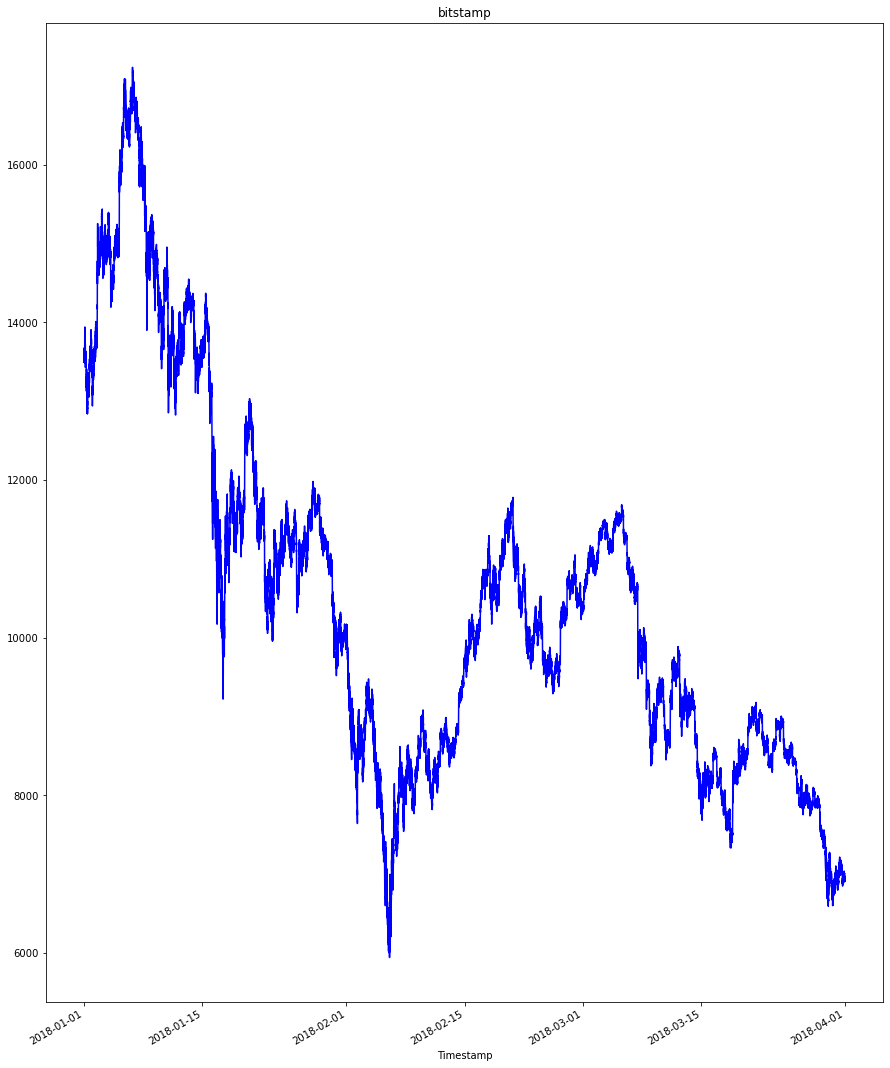

In [209]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(15, 20) , title="bitstamp" , color="Blue")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

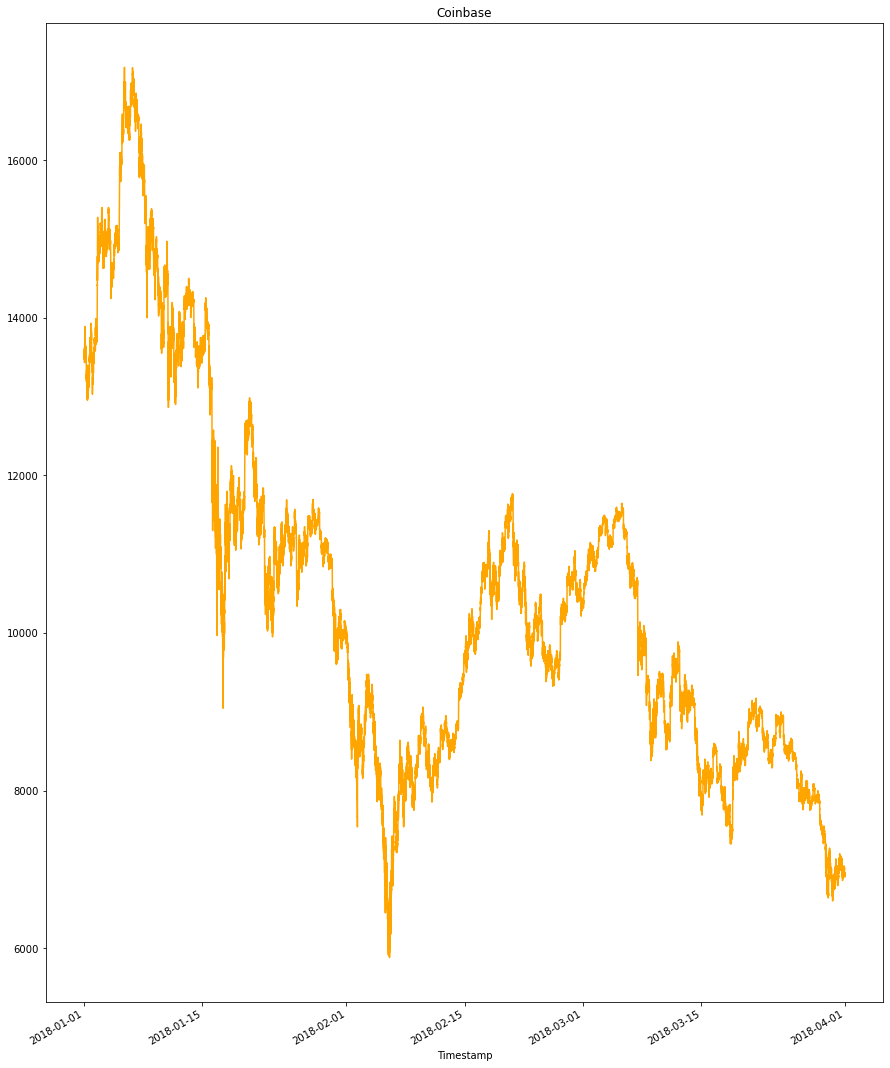

In [210]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15, 20) , title="Coinbase" , color="Orange")

<AxesSubplot:title={'center':'bitstamp v coinbase'}, xlabel='Timestamp'>

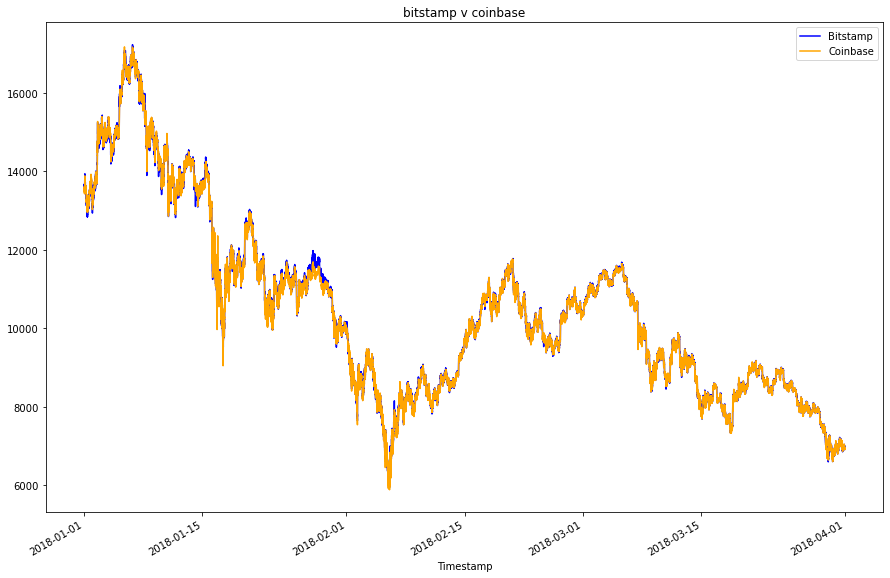

In [211]:
# Overlay t visualizations for the bitstamp and coinbase DataFrames in one plot
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="bitstamp v coinbase", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'JAN 2018'}, xlabel='Timestamp'>

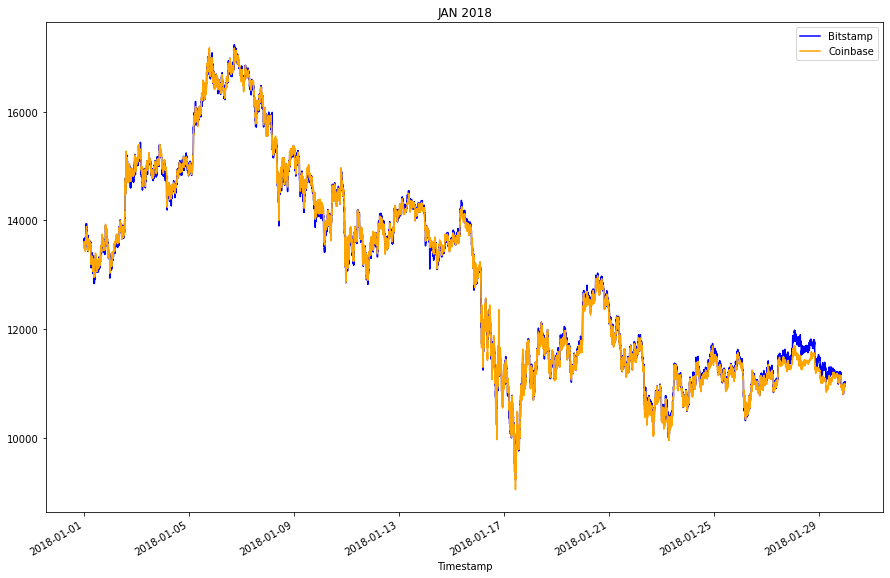

In [212]:
# overlay visualizes of both DataFrames for a one month period early in the dataset
 # price action 
bitstamp_sliced.loc["2018-01-01":"2018-01-29"].plot(legend=True, figsize=(15, 10), title="JAN 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-01":"2018-01-29"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'MARCH 2018'}, xlabel='Timestamp'>

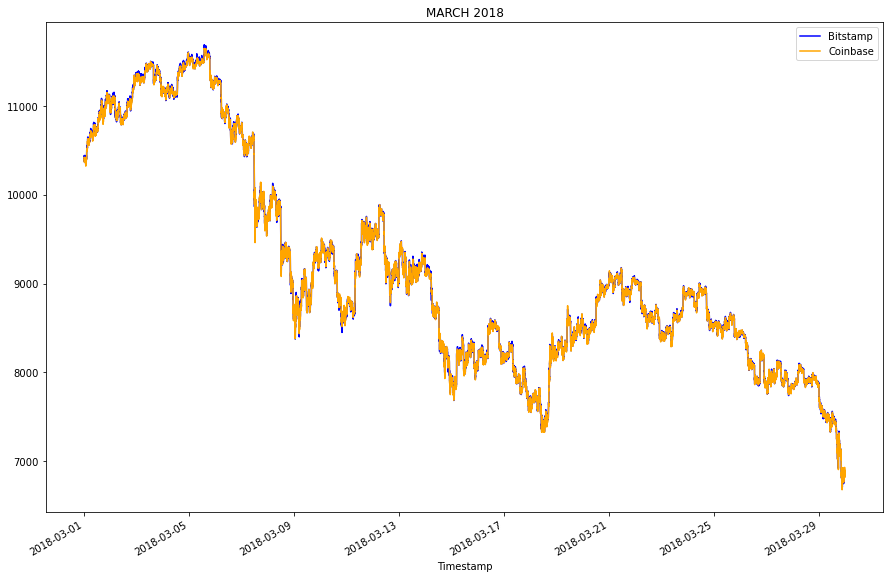

In [213]:
# overlay visualizes of both DataFrames for a one month period later in the dataset
#  price action 
bitstamp_sliced.loc["2018-03-01":"2018-03-29"].plot(legend=True, figsize=(15, 10), title="MARCH 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-01":"2018-03-29"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The closing price has sighnificantly been going down in the month of march 2018 on bitstamp and coinbase almost identical.

### Step 3: Focus Your Analysis on Specific Dates

Focus analysis on specific dates 

1.Use three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to gain a better understanding of the data before performing arbitrage calculations. 

<AxesSubplot:title={'center':'JAN 24 , 2018 '}, xlabel='Timestamp'>

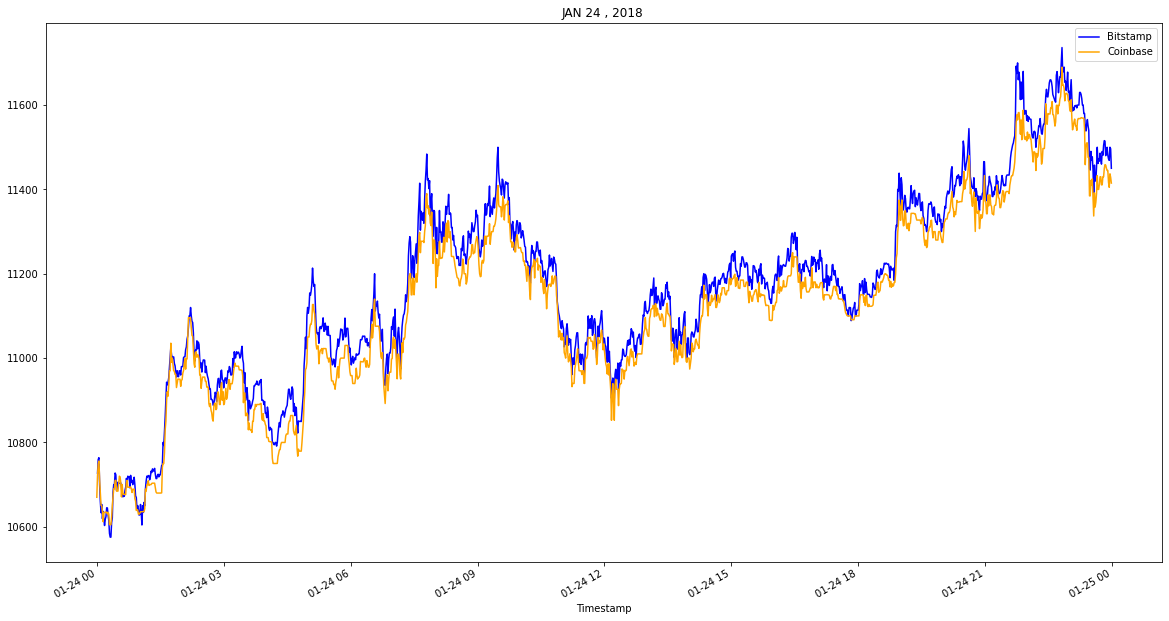

In [214]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the early of the dataset. 
bitstamp_sliced.loc["2018-01-24"].plot(legend=True, figsize=(20,11 ), title="JAN 24 , 2018 ", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-24"].plot(legend=True, figsize=(20,11), color="orange", label="Coinbase")

In [215]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc["2018-01-24"] - coinbase_sliced.loc["2018-01-24"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1437.000000
mean       42.100202
std        20.397093
min       -31.460000
25%        29.840000
50%        42.330000
75%        54.600000
max       135.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage -Early date'}>

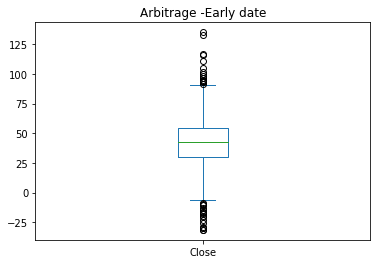

In [216]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box" , title ="Arbitrage -Early date")

<AxesSubplot:title={'center':'MARCH 11 , 2018 '}, xlabel='Timestamp'>

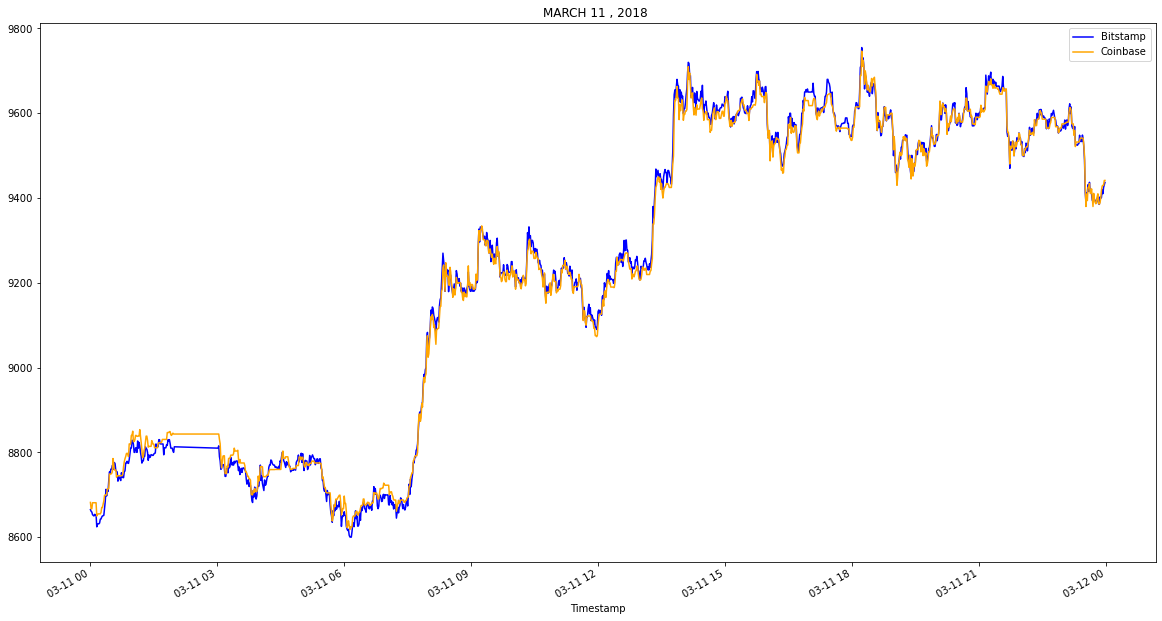

In [217]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-03-11"].plot(legend=True, figsize=(20,11 ), title="MARCH 11 , 2018 ", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-11"].plot(legend=True, figsize=(20,11), color="orange", label="Coinbase")

In [218]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc["2018-03-11"] - coinbase_sliced.loc["2018-03-11"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1375.000000
mean        2.408960
std        16.115702
min       -45.970000
25%        -7.675000
50%         3.300000
75%        13.215000
max        96.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage - Middle date'}>

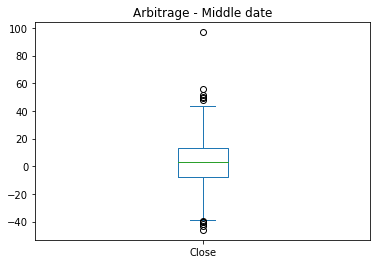

In [219]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind ="box", title ="Arbitrage - Middle date")

<AxesSubplot:title={'center':'MARCH 21 , 2018 '}, xlabel='Timestamp'>

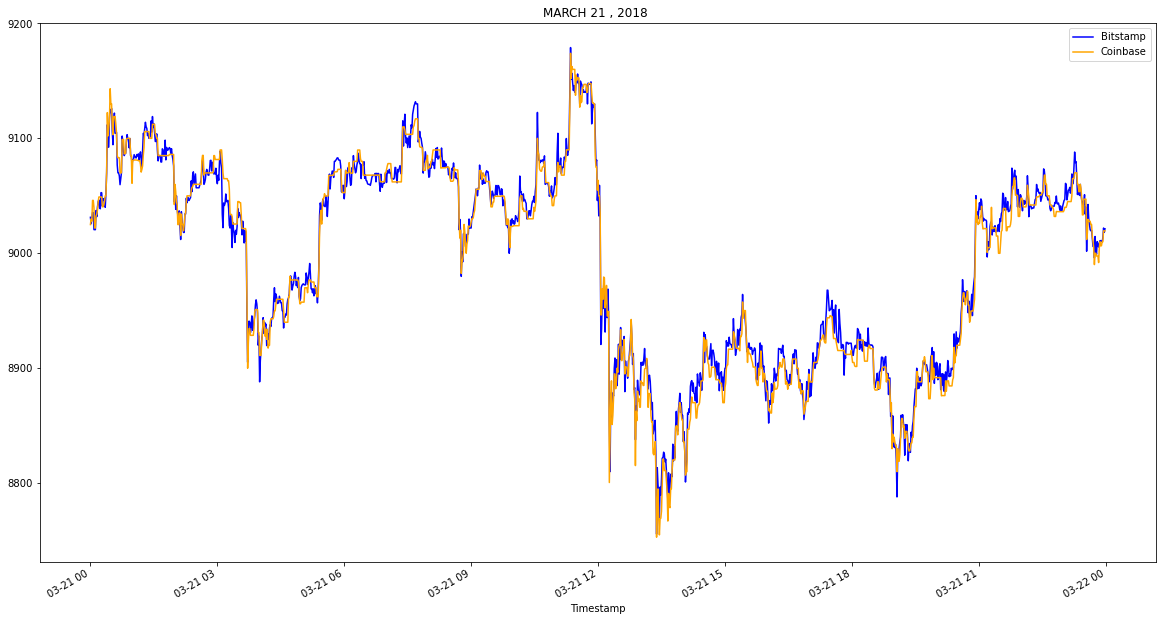

In [220]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
bitstamp_sliced.loc["2018-03-21"].plot(legend=True, figsize=(20,11 ), title="MARCH 21 , 2018 ", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-21"].plot(legend=True, figsize=(20,11), color="orange", label="Coinbase")

In [221]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc["2018-03-21"] - coinbase_sliced.loc["2018-03-21"]

arbitrage_spread_late.describe()

count    1432.000000
mean        3.109888
std         9.532888
min       -47.750000
25%        -3.000000
50%         3.000000
75%         9.097500
max        53.670000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage -late date'}>

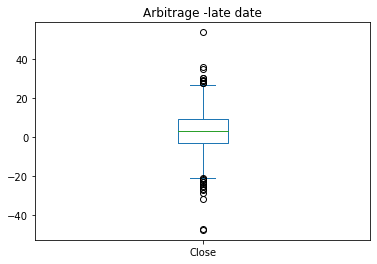

In [222]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box" , title ="Arbitrage -late date" )

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?



## Early Arbitrage 

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.



In [223]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_early = arbitrage_spread_early[arbitrage_spread_early>0] 

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_early.describe()

count    1403.000000
mean       43.415488
std        18.719001
min         0.010000
25%        30.815000
50%        42.900000
75%        54.995000
max       135.180000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [224]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 

# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).


spread_return_early = arbitrage_early  / bitstamp_sliced.loc["2018-01-24"]

# Review the spread return DataFrame
spread_return_early.describe()


count    1.403000e+03
mean     3.874434e-03
std      1.648925e-03
min      9.008993e-07
25%      2.762133e-03
50%      3.840214e-03
75%      4.894128e-03
max      1.155385e-02
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [225]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-24 07:38:00    0.010228
2018-01-24 20:29:00    0.010048
2018-01-24 21:44:00    0.011352
2018-01-24 21:46:00    0.011554
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [226]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_early.describe()

count    4.000000
mean     0.010795
std      0.000767
min      0.010048
25%      0.010183
50%      0.010790
75%      0.011402
max      0.011554
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [227]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc["2018-01-24"]

# Drop any missing values from the profit DataFrame
profit_early  = profit_early.dropna()

# View the early profit DataFrame
profit_early.head() 

Timestamp
2018-01-24 07:38:00    116.75
2018-01-24 20:29:00    115.70
2018-01-24 21:44:00    132.73
2018-01-24 21:46:00    135.18
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [228]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe() 

count      4.000000
mean     125.090000
std       10.294099
min      115.700000
25%      116.487500
50%      124.740000
75%      133.342500
max      135.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit-EARLY'}, xlabel='Timestamp'>

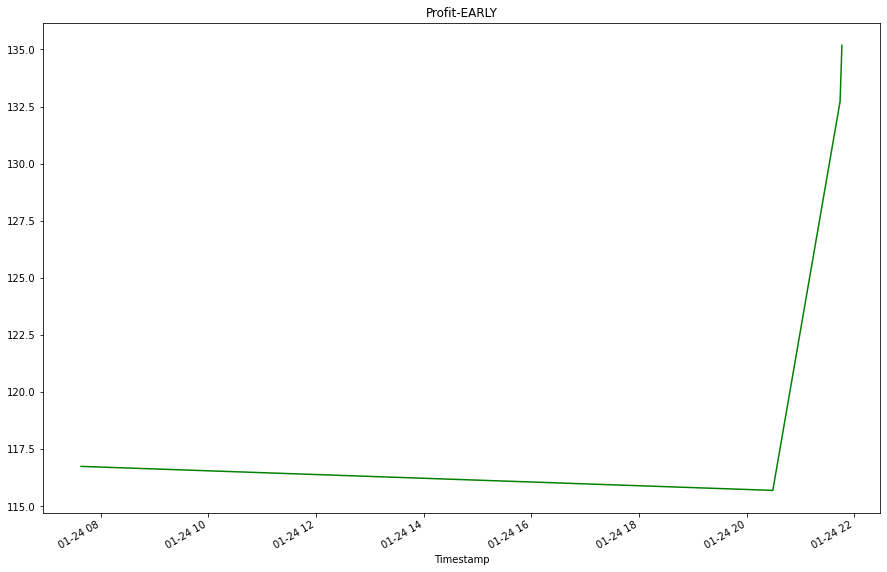

In [232]:
# Plot the results for the early profit per trade DataFrame
profit_early.plot(figsize=(15,10), title="Profit-EARLY" , color="Green")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [160]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early_sum =profit_early.sum()
profit_per_trade_early_sum

500.3600000000024

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [161]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()

<AxesSubplot:title={'center':'CUM SUM-EARLY'}, xlabel='Timestamp'>

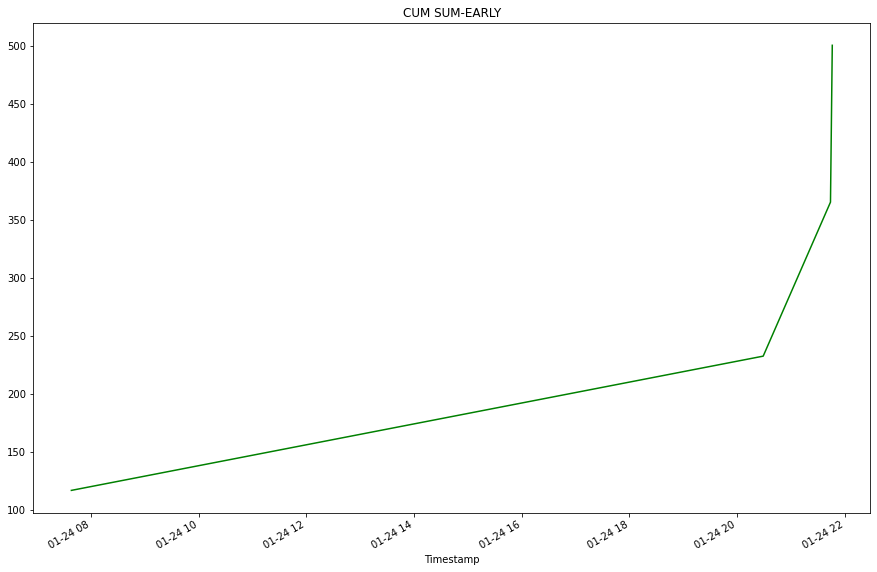

In [234]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15,10),title="CUM SUM-EARLY", color= 'Green')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** There are no opportunities for abitrage on JAN 16 ,2018 

In [163]:

arbitrage__middle = arbitrage_spread_middle[arbitrage_spread_middle>0] 
# bitstamp_sliced.loc["2018-03-02"]
arbitrage__middle.describe()

count    791.000000
mean      13.381049
std        9.867069
min        0.010000
25%        6.065000
50%       11.620000
75%       18.735000
max       96.920000
Name: Close, dtype: float64

In [164]:
spread_middle = arbitrage__middle / bitstamp_sliced.loc["2018-03-09"]
spread_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [165]:
trade_return_middle = spread_middle[spread_middle > .01]

profit_middle = trade_return_middle * bitstamp_sliced.loc["2018-03-05"]

In [166]:
profit_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [167]:
profit_middle = profit_middle.dropna()

In [168]:
profit_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'PROFIT-MIDDLE'}, xlabel='Timestamp'>

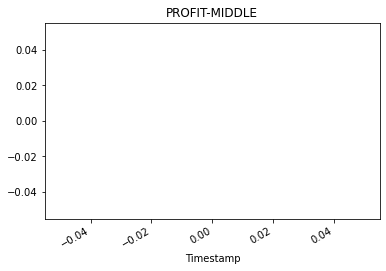

In [169]:
profit_middle.plot(title="PROFIT-MIDDLE",)

In [170]:
cum_profit_per_trade_middle =profit_middle.cumsum()

<AxesSubplot:title={'center':'PROFIT-MIDDLE'}, xlabel='Timestamp'>

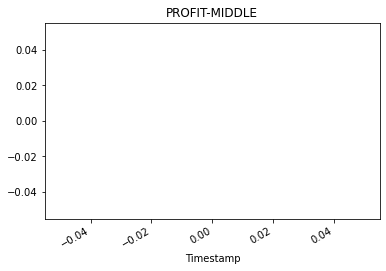

In [171]:
cum_profit_per_trade_middle.plot(title="PROFIT-MIDDLE")

In [172]:
profit_sum = profit_middle.sum()

In [173]:
profit_sum

0.0

In [174]:
# A profit of 1029.0 of a day's trading.

In [175]:
arbitrage_late = arbitrage_spread_late[arbitrage_spread_late>0]
# bitstamp_sliced.loc["2018-03-28"]
arbitrage_late.describe()

count    908.000000
mean       8.580154
std        6.413735
min        0.010000
25%        3.560000
50%        7.125000
75%       12.610000
max       53.670000
Name: Close, dtype: float64

In [176]:
arbitrage_late_SPREAD = arbitrage_late / bitstamp_sliced.loc["2018-03-29"]

arbitrage_late_SPREAD.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [177]:
arbitrage_late_return = arbitrage_late_SPREAD[arbitrage_late_SPREAD>.01]

arbitrage_late_profit = arbitrage_late_return * bitstamp_sliced.loc["2018-03-29"]

In [178]:
profit_late = arbitrage_late_profit.dropna()

In [179]:
profit_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [180]:
profit_late.sum()

0.0

<AxesSubplot:title={'center':'PROFIT-LATE'}, xlabel='Timestamp'>

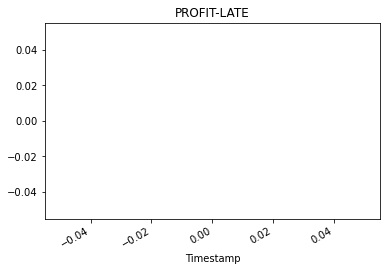

In [181]:
profit_late.plot(title="PROFIT-LATE")

<AxesSubplot:title={'center':'PROFIT-LATE'}, xlabel='Timestamp'>

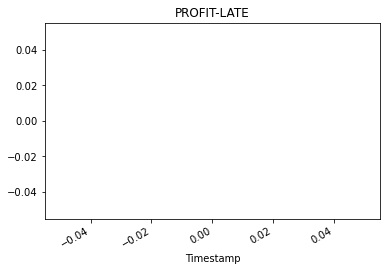

In [182]:
cum_profit_late= profit_late.cumsum()
cum_profit_late.plot( title="PROFIT-LATE")

In [183]:
profit_late.sum()

0.0